# Step 1: Reading and Understanding the Data

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('day (1).csv')
df = data
# Display the first few rows of the dataset
# print(data.head())
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
import numpy as np

# Step 2: Data Preparation
1. Convert categorical variables: Convert variables like season, weathersit, mnth, and weekday into categorical variables.
2. Check for missing values: Identify and handle any missing values appropriately.
3. Drop unnecessary columns: Drop columns like instant, dteday, casual, and registered since they are not needed for the regression model.

In [4]:
# Convert categorical variables to category type
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
data['mnth'] = data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data['weekday'] = data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Check for missing values
print("null values :", data.isnull().sum())

# Drop unnecessary columns
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)


null values : instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
data.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Sat           0       Mist  14.110847   
1  Spring   0  Jan        0     Sun           0       Mist  14.902598   
2  Spring   0  Jan        0     Mon           1      Clear   8.050924   
3  Spring   0  Jan        0     Tue           1      Clear   8.200000   
4  Spring   0  Jan        0     Wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

# Step 3: One-Hot Encoding for Categorical Variables

In [5]:
# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Convert boolean columns to integers
bool_columns = data.select_dtypes(include='bool').columns
data[bool_columns] = data[bool_columns].astype(int)

# Display the first few rows of the modified dataset
print(data.head())


   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  weekday_Mon  \
0              1              0  ...         0         0            0   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            1   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            1            0 

In [6]:
# Display the first few rows of the modified dataset
print(data.head())

# Verify the data types to ensure binary encoding
print(data.dtypes)

   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  weekday_Mon  \
0              1              0  ...         0         0            0   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            1   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            1            0 

# Step 3: Exploratory Data Analysis (EDA)
Conduct some initial exploratory data analysis to understand the data better.
Since we have now converted categorical variables to numerical, we can proceed with the correlation matrix and pairplot.

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

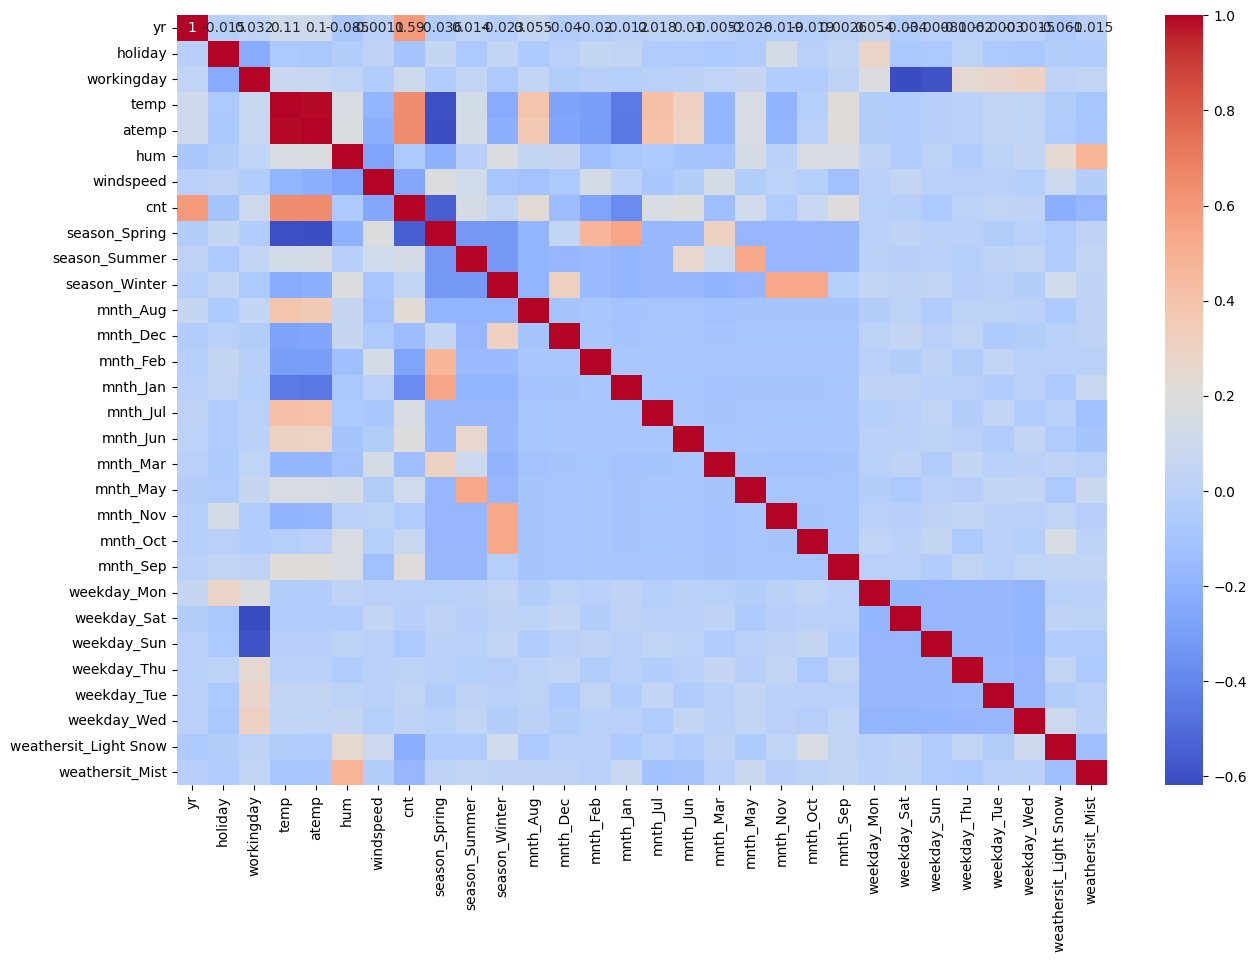

D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

In [67]:
# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot to see relationships
sns.pairplot(df_train)
plt.show()

In [7]:
df_train.corr()

NameError: name 'df_train' is not defined

In [141]:
# Pairplot to see relationships
sns.pairplot(df_train)

plt.figure(figsize=(15, 10))
plt.show()


D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

<Figure size 1500x1000 with 0 Axes>

# Step 4: Split the Data
Split the data into training and testing sets.

In [ ]:
# # Separate features and target variable
# X = data.drop('cnt', axis=1)
# y = data['cnt']

# # Standardize the features
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
df_train.shape

(510, 30)

In [11]:
df_test.shape

(219, 30)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [13]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  \
653  0.864243              0              0  ...         1         0   
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            1   
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            1            0            0   
482            0            1            0            0            0   

     weekday_Wed  weathersit_Light Snow  weathersit_Mist  
653            0                      0                0  
576            0                      0                0  
426            0                      0                1  
728            0                      0                0  
482            0                      0                1  

[5 rows x 30 columns]

In [14]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_Spring  season_Summer  ...    mnth_Oct  \
count  510.000000  510.000000     510.000000     510.000000  ...  510.000000   
mean     0.320768    0.513620       0.243137       0.245098  ...    0.086275   
std      0.169797    0.224593       0.429398       0.430568  ...    0.281045   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.199179    0.356420       0.000000       0.000000  ...    0.000000   
50%      0.296763    0.518638       0.000000       0.000000  ...    0.000000   
75%      0.414447    0.684710       0.000000       0.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
count  510.000000   510.000000   510.000000   510.000000   510.000000   
mean     0.080392     0.150980     0.154902     0.143137     0.133333   
std      0.272166     0.358381     0.362166     0.350557     0.340268   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Tue  weekday_Wed  weathersit_Light Snow  weathersit_Mist  
count   510.000000   510.000000             510.000000       510.000000  
mean      0.131373     0.158824               0.029412         0.343137  
std       0.338139     0.365870               0.169124         0.475223  
min       0.000000     0.000000               0.000000         0.000000  
25%       0.000000     0.000000               0.000000         0.000000  
50%       0.000000     0.000000               0.000000         0.000000  
75%       0.000000     0.000000               0.000000         1.000000  
max       1.000000     1.000000               1.000000         1.000000  

[8 rows x 30 columns]

## Dividing into X and Y sets for the model building

In [15]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Build and Train the Multiple Linear Regression Model

In [16]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    0.245237
yr                       0.232208
holiday                  0.010689
workingday               0.096962
temp                     0.401322
atemp                    0.050628
hum                     -0.151812
windspeed               -0.184388
season_Spring           -0.048580
season_Summer            0.038216
season_Winter            0.105387
mnth_Aug                 0.016076
mnth_Dec                -0.045572
mnth_Feb                -0.032176
mnth_Jan                -0.062565
mnth_Jul                -0.039277
mnth_Jun                -0.001704
mnth_Mar                 0.001288
mnth_May                 0.024691
mnth_Nov                -0.041783
mnth_Oct                 0.007695
mnth_Sep                 0.081806
weekday_Mon             -0.021502
weekday_Sat              0.096059
weekday_Sun              0.041527
weekday_Thu             -0.009750
weekday_Tue             -0.019308
weekday_Wed             -0.005733
weathersit_Light Snow   -0.256697
weathersit_Mis

In [17]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          8.42e-181
Time:                        17:59:12   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

## Checking VIF

In [19]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2              workingday  85.60
3                    temp  67.12
4                   atemp  56.09
22            weekday_Sat  19.72
23            weekday_Sun  18.35
7           season_Spring  10.80
9           season_Winter   9.52
8           season_Summer   8.31
18               mnth_Nov   6.80
19               mnth_Oct   6.59
10               mnth_Aug   6.54
13               mnth_Jan   5.90
14               mnth_Jul   5.70
11               mnth_Dec   5.68
20               mnth_Sep   4.96
1                 holiday   4.51
12               mnth_Feb   4.39
16               mnth_Mar   3.47
15               mnth_Jun   2.88
17               mnth_May   2.24
5                     hum   2.05
21            weekday_Mon   1.98
26            weekday_Wed   1.94
24            weekday_Thu   1.83
25            weekday_Tue   1.80
28        weathersit_Mist   1.60
6               windspeed   1.30
27  weathersit_Light Snow   1.30
0                      yr   1.06

## dropping the workingday
due to high VIF

In [21]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_Spring  season_Summer  season_Winter  ...  mnth_Oct  mnth_Sep  \
653              0              0              1  ...         1         0   
576              0              0              0  ...         0         0   
426              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
482              0              1              0  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            1   
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            1            0            0   
482            0            1            0            0            0   

     weekday_Wed  weathersit_Light Snow  weathersit_Mist  
653            0                      0                0  
576            0                      0                0  
426            0                      0                1  
728            0                      0                0  
482            0                      0                1  

[5 rows x 29 columns]

In [22]:
X = X_train.drop('workingday', axis=1)

In [23]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          8.42e-181
Time:                        18:01:43   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [24]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                    temp  435.42
3                   atemp  383.92
4                     hum   38.23
6           season_Spring   11.83
8           season_Winter   11.79
7           season_Summer    6.91
18               mnth_Oct    6.40
17               mnth_Nov    6.12
9                mnth_Aug    6.02
5               windspeed    5.38
13               mnth_Jul    5.31
12               mnth_Jan    5.22
10               mnth_Dec    4.94
19               mnth_Sep    4.31
11               mnth_Feb    3.97
15               mnth_Mar    3.37
14               mnth_Jun    3.01
16               mnth_May    2.45
27        weathersit_Mist    2.40
20            weekday_Mon    2.27
25            weekday_Wed    2.26
21            weekday_Sat    2.20
0                      yr    2.14
22            weekday_Sun    2.13
23            weekday_Thu    2.06
24            weekday_Tue    2.02
26  weathersit_Light Snow    1.32
1                 holiday    1.18

## dropping the temp
due to high VIF

In [89]:
X = X.drop('temp', axis=1)

In [91]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          4.12e-180
Time:                        01:46:15   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [90]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                     hum  37.67
2                   atemp  32.72
5           season_Spring  11.82
7           season_Winter  11.78
6           season_Summer   6.91
17               mnth_Oct   6.38
16               mnth_Nov   6.12
8                mnth_Aug   5.41
11               mnth_Jan   5.21
4               windspeed   4.95
9                mnth_Dec   4.93
12               mnth_Jul   4.90
18               mnth_Sep   4.13
10               mnth_Feb   3.97
14               mnth_Mar   3.37
13               mnth_Jun   2.71
26        weathersit_Mist   2.39
15               mnth_May   2.36
19            weekday_Mon   2.26
24            weekday_Wed   2.25
20            weekday_Sat   2.20
21            weekday_Sun   2.13
0                      yr   2.12
22            weekday_Thu   2.05
23            weekday_Tue   2.02
25  weathersit_Light Snow   1.32
1                 holiday   1.17

## dropping the hum
due to high VIF

In [25]:
X = X.drop('hum', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.61e-178
Time:                        18:02:47   Log-Likelihood:                 519.93
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     482   BIC:                            -865.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [26]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                    temp  429.09
3                   atemp  383.56
7           season_Winter   11.58
5           season_Spring   11.34
17               mnth_Oct    5.96
6           season_Summer    5.88
8                mnth_Aug    5.79
16               mnth_Nov    5.57
12               mnth_Jul    5.24
4               windspeed    5.22
11               mnth_Jan    4.61
9                mnth_Dec    4.23
18               mnth_Sep    3.94
10               mnth_Feb    3.69
14               mnth_Mar    3.20
13               mnth_Jun    3.01
15               mnth_May    2.42
24            weekday_Wed    2.24
19            weekday_Mon    2.24
20            weekday_Sat    2.19
0                      yr    2.12
21            weekday_Sun    2.09
22            weekday_Thu    2.05
23            weekday_Tue    2.00
26        weathersit_Mist    1.62
1                 holiday    1.18
25  weathersit_Light Snow    1.12

## dropping the atemp
due to high VIF

In [27]:
X = X.drop('atemp', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_4.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.60e-179
Time:                        18:03:12   Log-Likelihood:                 519.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     483   BIC:                            -871.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

Features    VIF
2                    temp  27.34
6           season_Winter  11.55
4           season_Spring  11.32
16               mnth_Oct   5.96
5           season_Summer   5.85
7                mnth_Aug   5.66
15               mnth_Nov   5.57
11               mnth_Jul   5.19
3               windspeed   4.92
10               mnth_Jan   4.61
8                mnth_Dec   4.23
17               mnth_Sep   3.92
9                mnth_Feb   3.69
13               mnth_Mar   3.20
12               mnth_Jun   2.94
14               mnth_May   2.40
23            weekday_Wed   2.23
18            weekday_Mon   2.21
19            weekday_Sat   2.18
0                      yr   2.12
20            weekday_Sun   2.08
21            weekday_Thu   2.03
22            weekday_Tue   1.99
25        weathersit_Mist   1.62
1                 holiday   1.17
24  weathersit_Light Snow   1.12

## dropping the season_spring
due to high VIF

In [28]:
X = X.drop('season_Spring', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.75e-180
Time:                        18:04:26   Log-Likelihood:                 518.32
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     484   BIC:                            -874.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

Features    VIF
2                    temp  25.92
5           season_Winter   8.08
15               mnth_Oct   5.66
14               mnth_Nov   5.19
6                mnth_Aug   5.11
10               mnth_Jul   4.72
3               windspeed   4.70
4           season_Summer   4.20
16               mnth_Sep   3.78
7                mnth_Dec   3.36
11               mnth_Jun   2.90
13               mnth_May   2.38
22            weekday_Wed   2.20
17            weekday_Mon   2.20
18            weekday_Sat   2.15
0                      yr   2.12
19            weekday_Sun   2.04
20            weekday_Thu   2.02
21            weekday_Tue   1.98
12               mnth_Mar   1.96
9                mnth_Jan   1.89
8                mnth_Feb   1.80
24        weathersit_Mist   1.62
1                 holiday   1.17
23  weathersit_Light Snow   1.12

## dropping the mnth_Oct
now that VIF is under 10 dropping this due its hight p value

In [29]:
X = X.drop('mnth_Oct', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_6.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.52e-181
Time:                        18:06:32   Log-Likelihood:                 518.28
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     485   BIC:                            -880.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

Features    VIF
2                    temp  21.48
3               windspeed   4.60
5           season_Winter   4.04
6                mnth_Aug   3.93
10               mnth_Jul   3.67
4           season_Summer   3.52
11               mnth_Jun   2.48
15               mnth_Sep   2.45
13               mnth_May   2.23
16            weekday_Mon   2.17
21            weekday_Wed   2.17
0                      yr   2.11
17            weekday_Sat   2.11
18            weekday_Sun   2.01
19            weekday_Thu   1.99
20            weekday_Tue   1.96
14               mnth_Nov   1.87
12               mnth_Mar   1.70
9                mnth_Jan   1.70
23        weathersit_Mist   1.61
8                mnth_Feb   1.59
7                mnth_Dec   1.50
1                 holiday   1.17
22  weathersit_Light Snow   1.11

## dropping weekday_Sat
due high p value

In [30]:
X = X.drop('weekday_Sat', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_7.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.00e-182
Time:                        18:06:56   Log-Likelihood:                 518.27
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     486   BIC:                            -886.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

Features    VIF
2                    temp  20.47
3               windspeed   4.52
5           season_Winter   3.94
6                mnth_Aug   3.92
10               mnth_Jul   3.66
4           season_Summer   3.43
11               mnth_Jun   2.48
15               mnth_Sep   2.44
13               mnth_May   2.23
0                      yr   2.11
14               mnth_Nov   1.85
12               mnth_Mar   1.64
16            weekday_Mon   1.62
22        weathersit_Mist   1.61
20            weekday_Wed   1.57
9                mnth_Jan   1.53
8                mnth_Feb   1.51
17            weekday_Sun   1.49
18            weekday_Thu   1.49
19            weekday_Tue   1.47
7                mnth_Dec   1.45
1                 holiday   1.17
21  weathersit_Light Snow   1.10

## dropping mnth_Jul
due high p value

In [32]:
X = X.drop('mnth_Jul', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_8.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.47e-183
Time:                        18:10:19   Log-Likelihood:                 518.24
No. Observations:                 510   AIC:                            -990.5
Df Residuals:                     487   BIC:                            -893.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

Features   VIF
2                    temp  7.50
3               windspeed  4.47
5           season_Winter  2.79
4           season_Summer  2.73
0                      yr  2.10
12               mnth_May  1.88
13               mnth_Nov  1.85
6                mnth_Aug  1.82
15            weekday_Mon  1.62
10               mnth_Jun  1.61
21        weathersit_Mist  1.61
19            weekday_Wed  1.57
16            weekday_Sun  1.49
17            weekday_Thu  1.48
18            weekday_Tue  1.47
14               mnth_Sep  1.45
9                mnth_Jan  1.44
7                mnth_Dec  1.44
11               mnth_Mar  1.40
8                mnth_Feb  1.39
1                 holiday  1.16
20  weathersit_Light Snow  1.10

## dropping weekday_Wed
due high p value


In [33]:

X = X.drop('weekday_Wed', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_9.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.60e-184
Time:                        18:12:40   Log-Likelihood:                 518.07
No. Observations:                 510   AIC:                            -992.1
Df Residuals:                     488   BIC:                            -899.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

Features   VIF
2                    temp  7.04
3               windspeed  4.47
5           season_Winter  2.77
4           season_Summer  2.71
0                      yr  2.10
12               mnth_May  1.88
13               mnth_Nov  1.83
6                mnth_Aug  1.82
20        weathersit_Mist  1.61
10               mnth_Jun  1.60
14               mnth_Sep  1.45
15            weekday_Mon  1.45
7                mnth_Dec  1.43
9                mnth_Jan  1.39
11               mnth_Mar  1.38
8                mnth_Feb  1.35
16            weekday_Sun  1.32
17            weekday_Thu  1.32
18            weekday_Tue  1.31
1                 holiday  1.16
19  weathersit_Light Snow  1.10

## dropping weekday_Thu
due high p value

In [34]:
X = X.drop('weekday_Thu', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_10.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.24e-185
Time:                        18:13:05   Log-Likelihood:                 517.96
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     489   BIC:                            -905.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

Features   VIF
2                    temp  6.82
3               windspeed  4.47
5           season_Winter  2.77
4           season_Summer  2.71
0                      yr  2.10
12               mnth_May  1.88
6                mnth_Aug  1.82
13               mnth_Nov  1.82
10               mnth_Jun  1.60
19        weathersit_Mist  1.60
14               mnth_Sep  1.44
7                mnth_Dec  1.42
9                mnth_Jan  1.36
11               mnth_Mar  1.36
15            weekday_Mon  1.36
8                mnth_Feb  1.35
16            weekday_Sun  1.26
17            weekday_Tue  1.25
1                 holiday  1.16
18  weathersit_Light Snow  1.10

## dropping mnth_Jun
due high p value

In [36]:
X = X.drop('mnth_Jun', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_11.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.81e-186
Time:                        18:16:55   Log-Likelihood:                 517.49
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     490   BIC:                            -910.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

Features   VIF
2                    temp  5.52
3               windspeed  4.43
5           season_Winter  2.71
4           season_Summer  2.55
0                      yr  2.09
12               mnth_Nov  1.81
6                mnth_Aug  1.66
11               mnth_May  1.62
18        weathersit_Mist  1.60
7                mnth_Dec  1.42
13               mnth_Sep  1.37
14            weekday_Mon  1.36
9                mnth_Jan  1.36
8                mnth_Feb  1.34
10               mnth_Mar  1.31
15            weekday_Sun  1.26
16            weekday_Tue  1.24
1                 holiday  1.16
17  weathersit_Light Snow  1.09

## dropping mnth_May
due high p value



In [38]:

X = X.drop('mnth_May', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_12.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.78e-187
Time:                        18:18:25   Log-Likelihood:                 517.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     491   BIC:                            -916.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

Features   VIF
2                    temp  5.42
3               windspeed  4.40
5           season_Winter  2.70
0                      yr  2.09
4           season_Summer  2.05
11               mnth_Nov  1.81
6                mnth_Aug  1.65
17        weathersit_Mist  1.59
7                mnth_Dec  1.42
12               mnth_Sep  1.37
13            weekday_Mon  1.36
9                mnth_Jan  1.36
8                mnth_Feb  1.34
10               mnth_Mar  1.28
14            weekday_Sun  1.25
15            weekday_Tue  1.24
1                 holiday  1.16
16  weathersit_Light Snow  1.09

## dropping mnth_Mar
due high p value



In [43]:

# X = X.drop('mnth_Mar', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_13.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.82e-188
Time:                        18:22:09   Log-Likelihood:                 515.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     493   BIC:                            -925.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

Features   VIF
2                    temp  5.24
3               windspeed  3.93
5           season_Winter  2.63
0                      yr  2.07
4           season_Summer  2.03
10               mnth_Nov  1.81
6                mnth_Aug  1.62
15        weathersit_Mist  1.57
7                mnth_Dec  1.41
11               mnth_Sep  1.35
12            weekday_Mon  1.32
9                mnth_Jan  1.30
8                mnth_Feb  1.27
13            weekday_Sun  1.21
1                 holiday  1.16
14  weathersit_Light Snow  1.09

## dropping weekday_Tue
due high p value

In [42]:

X = X.drop('weekday_Tue', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_14.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.82e-188
Time:                        18:21:46   Log-Likelihood:                 515.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     493   BIC:                            -925.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

Features   VIF
2                    temp  5.24
3               windspeed  3.93
5           season_Winter  2.63
0                      yr  2.07
4           season_Summer  2.03
10               mnth_Nov  1.81
6                mnth_Aug  1.62
15        weathersit_Mist  1.57
7                mnth_Dec  1.41
11               mnth_Sep  1.35
12            weekday_Mon  1.32
9                mnth_Jan  1.30
8                mnth_Feb  1.27
13            weekday_Sun  1.21
1                 holiday  1.16
14  weathersit_Light Snow  1.09

## dropping weekday_Mon
due high p value

In [44]:

X = X.drop('weekday_Mon', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_15.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.48e-189
Time:                        18:24:37   Log-Likelihood:                 514.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

Features   VIF
2                    temp  5.20
3               windspeed  3.92
5           season_Winter  2.61
0                      yr  2.06
4           season_Summer  2.03
10               mnth_Nov  1.81
6                mnth_Aug  1.62
14        weathersit_Mist  1.57
7                mnth_Dec  1.41
11               mnth_Sep  1.35
9                mnth_Jan  1.29
8                mnth_Feb  1.27
12            weekday_Sun  1.18
13  weathersit_Light Snow  1.09
1                 holiday  1.07

## dropping mnth_Feb
due high p value


In [45]:


X = X.drop('mnth_Feb', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_16.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.52e-189
Time:                        18:27:23   Log-Likelihood:                 512.27
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     495   BIC:                            -931.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

Features   VIF
2                    temp  5.17
3               windspeed  3.44
5           season_Winter  2.56
0                      yr  2.04
4           season_Summer  1.89
9                mnth_Nov  1.80
6                mnth_Aug  1.60
13        weathersit_Mist  1.55
7                mnth_Dec  1.40
10               mnth_Sep  1.34
8                mnth_Jan  1.24
11            weekday_Sun  1.17
12  weathersit_Light Snow  1.09
1                 holiday  1.06

## dropping mnth_Nov
due high p value


In [46]:
X = X.drop('mnth_Nov', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_17.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.26e-190
Time:                        18:28:22   Log-Likelihood:                 510.53
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

Features   VIF
2                    temp  5.14
3               windspeed  3.39
0                      yr  2.04
4           season_Summer  1.89
5           season_Winter  1.71
6                mnth_Aug  1.60
12        weathersit_Mist  1.55
9                mnth_Sep  1.32
7                mnth_Dec  1.23
8                mnth_Jan  1.23
10            weekday_Sun  1.17
11  weathersit_Light Snow  1.09
1                 holiday  1.04

## dropping mnth_Dec
due high p value

In [47]:
X = X.drop('mnth_Dec', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_18.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.17e-190
Time:                        18:30:23   Log-Likelihood:                 508.83
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     497   BIC:                            -936.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

Features   VIF
2                    temp  5.13
3               windspeed  3.36
0                      yr  2.04
4           season_Summer  1.88
6                mnth_Aug  1.60
5           season_Winter  1.56
11        weathersit_Mist  1.54
8                mnth_Sep  1.32
7                mnth_Jan  1.23
9             weekday_Sun  1.17
10  weathersit_Light Snow  1.08
1                 holiday  1.04

## dropping mnth_Jan
due high p value

In [51]:
# X = X.drop('mnth_Jan', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_19.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.80e-190
Time:                        18:36:20   Log-Likelihood:                 505.80
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

Features   VIF
2                    temp  5.09
3               windspeed  3.13
0                      yr  2.00
4           season_Summer  1.81
6                mnth_Aug  1.59
5           season_Winter  1.50
10        weathersit_Mist  1.49
7                mnth_Sep  1.31
8             weekday_Sun  1.17
9   weathersit_Light Snow  1.08
1                 holiday  1.04

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [52]:
y_train_cnt = lr_19.predict(X_train_lm)

C:\Users\kshit\AppData\Local\Temp\ipykernel_21800\2756863869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

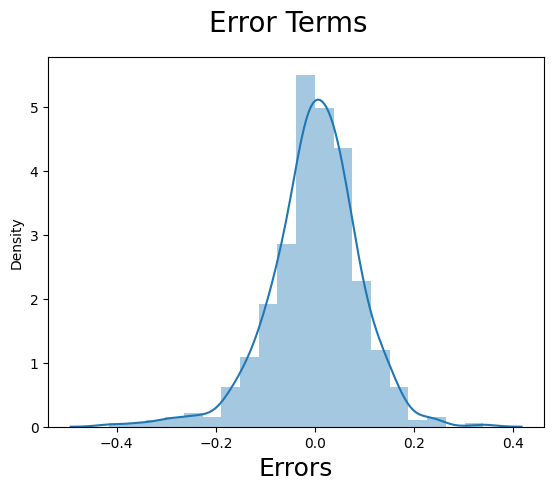

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plot of the error terms suggest that the linear regression model is performing well, with errors that are normally distributed and centered around zero, indicating a good fit and adherence to the assumptions of linear regression.

# Step 7: Model Evaluation
Include the calculation of the R-squared score on the test set.

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [57]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.546312    0.530942    0.508750   
std      0.500722    0.188034    0.459904    0.249189    0.228159    0.201253   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.328479    0.333829    0.358469   
50%      0.000000    0.000000    1.000000    0.546045    0.547913    0.494200   
75%      1.000000    0.000000    1.000000    0.759735    0.720622    0.651165   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_Spring  season_Summer  ...    mnth_Oct  \
count  219.000000  219.000000     219.000000     219.000000  ...  219.000000   
mean     0.418870    0.516216       0.255708       0.264840  ...    0.082192   
std      0.188111    0.238702       0.437258       0.442259  ...    0.275286   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.283817    0.359882       0.000000       0.000000  ...    0.000000   
50%      0.402533    0.520241       0.000000       0.000000  ...    0.000000   
75%      0.524362    0.682487       1.000000       1.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
count  219.000000   219.000000   219.000000   219.000000   219.000000   
mean     0.086758     0.127854     0.118721     0.146119     0.164384   
std      0.282125     0.334692     0.324202     0.354034     0.371472   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Tue  weekday_Wed  weathersit_Light Snow  weathersit_Mist  
count   219.000000   219.000000             219.000000       219.000000  
mean      0.164384     0.100457               0.027397         0.319635  
std       0.371472     0.301297               0.163612         0.467403  
min       0.000000     0.000000               0.000000         0.000000  
25%       0.000000     0.000000               0.000000         0.000000  
50%       0.000000     0.000000               0.000000         0.000000  
75%       0.000000     0.000000               0.000000         1.000000  
max       1.000000     1.000000               1.000000         1.000000  

[8 rows x 30 columns]

## Dividing into X and Y sets for the model testing

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Adding constant variable to test dataframe
X_test_20m = sm.add_constant(X_test)

In [59]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Aug', 'mnth_Sep', 'weekday_Sun',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [63]:
X_test_20m.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [65]:
# Get the set of columns for each DataFrame
columns_test = set(X_test_20m.columns)
columns_train = set(X_train_lm.columns)

# Find the columns that are in X_test_m but not in X_train_lm
columns_to_drop = columns_test - columns_train
columns_to_drop 

{'atemp',
 'hum',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'season_Spring',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'workingday'}

In [66]:
# Drop those columns from X_test_m
X_test_20m.drop(columns=columns_to_drop, inplace=True)

In [68]:
y_pred_20m = lr_19.predict(X_test_20m)

Text(0, 0.5, 'y_pred')

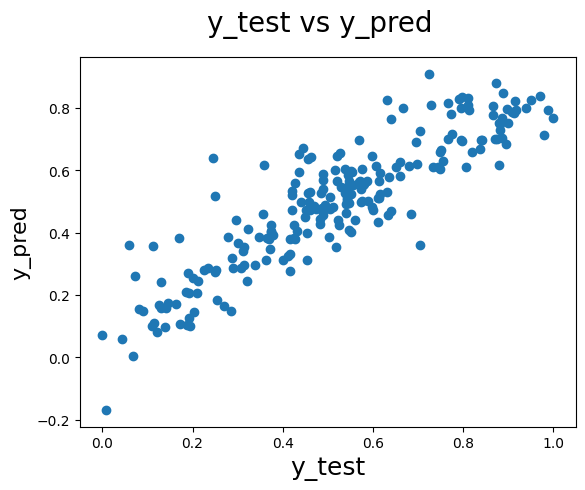

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_20m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

the scatter plot indicates that the model is performing well, with predictions that closely match the actual values for the majority of data points. The positive correlation and the clustering around the diagonal suggest that the model is effective in capturing the relationship in the data. 

## R-squared

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_20m)


0.7875718768555529

R-squared of test data for above model is `0.7875718768555529`

## Best fitted line

We can see that the equation of our best fitted line is:

`cnt=0.1392+0.2324⋅yr−0.1050⋅holiday+0.5181⋅temp−0.1498⋅windspeed+0.0990⋅season_Summer+0.1396⋅season_Winter+0.0513⋅mnth_Aug
+0.1136⋅mnth_Sep−0.0485⋅weekday_Sun−0.2881⋅weathersit_Light Snow−0.0844⋅weathersit_Mist`

Based on their significance (determined by the absolute magnitude of their t-statistics or coefficients relative to their standard errors), here's a list of significant variables in predicting the demand for shared bikes:

1. **temp (temperature)**
   - **Coefficient**: 0.5181
   - **P-value**: 0.000
   - **Interpretation**: Temperature has the highest coefficient among the significant variables, indicating the strongest positive impact on bike demand.




2. **yr (year)**
   - **Coefficient**: 0.2324
   - **P-value**: 0.000
   - **Interpretation**: Year also shows a strong positive impact on bike demand, though slightly less than temperature.


3. **weathersit_Light Snow**
   - **Coefficient**: -0.2881
   - **P-value**: 0.000
   - **Interpretation**: Light snow has a significant negative impact on bike demand, with a substantial negative coefficient.


4. **weathersit_Mist**
   - **Coefficient**: -0.0844
   - **P-value**: 0.000
   - **Interpretation**: Misty weather conditions also negatively affect bike demand, though to a lesser extent than light snow.


5. **season_Winter**
   - **Coefficient**: 0.1396
   - **P-value**: 0.000
   - **Interpretation**: Winter season has a significant positive impact on bike demand, indicating more rentals during winter compared to other seasons.


6. **mnth_Sep (September)**
   - **Coefficient**: 0.1136
   - **P-value**: 0.000
   - **Interpretation**: September shows a significant positive impact on bike demand, suggesting increased rentals during this month.


7. **holiday**
   - **Coefficient**: -0.1050
   - **P-value**: 0.000
   - **Interpretation**: Holidays have a significant negative impact on bike demand, reducing rentals compared to regular days.


8. **season_Summer**
   - **Coefficient**: 0.0990
   - **P-value**: 0.000
   - **Interpretation**: Summer season also positively impacts bike demand, though slightly less than winter.


9. **windspeed**
   - **Coefficient**: -0.1498
   - **P-value**: 0.000
   - **Interpretation**: Windspeed has a significant negative impact on bike demand, indicating fewer rentals during windy conditions.


10. **mnth_Aug (August)**
    - **Coefficient**: 0.0513
    - **P-value**: 0.002
    - **Interpretation**: August shows a significant positive impact on bike demand, though less pronounced compared to other variables.


11. **weekday_Sun (Sunday)**
    - **Coefficient**: -0.0485
    - **P-value**: 0.000
    - **Interpretation**: Sundays have a significant negative impact on bike demand, indicating fewer rentals compared to other weekdays.


The coefficients represent the estimated effect size on bike demand, and the P-values indicate the statistical significance of each variable's impact.

### Summary of Variables Describing Bike Demand:

#### Weather-related Variables:
- **Temperature (temp)**: Temperature has a strong positive impact on bike demand, indicating that warmer weather encourages more bike rentals.
- **Weather Conditions (weathersit_Light Snow, weathersit_Mist)**: Light snow and misty conditions have significant negative impacts on bike demand, reducing rentals during adverse weather.

#### Seasonal and Monthly Variables:
- **Seasons (season_Summer, season_Winter)**: Both summer and winter seasons positively influence bike demand, with winter showing a slightly stronger impact. This suggests that favorable weather conditions in both seasons contribute to increased rentals.
- **Months (mnth_Aug, mnth_Sep)**: August and September exhibit significant positive impacts on bike demand. These months likely coincide with peak tourist seasons, favorable weather, or cultural events.

#### Temporal Variables:
- **Year (yr)**: Year shows a positive impact on bike demand, indicating a trend of increasing popularity or availability of bike-sharing services over time.
- **Weekday (weekday_Sun)**: Sundays have a negative impact on bike demand compared to other weekdays, possibly due to reduced commuting or leisure activities on weekends.

#### Other Factors:
- **Holiday**: Holidays negatively affect bike demand, suggesting fewer rentals during holiday periods.
- **Windspeed**: Higher windspeeds negatively impact bike demand, likely due to discomfort or safety concerns associated with windy conditions.

### Model Fit and Explanation:

- **R-squared (Adjusted R-squared)**: The model’s R-squared value of 0.840 (Adjusted R-squared: 0.836) indicates that approximately 84% of the variance in bike demand is explained by the included variables. This suggests that the model provides a robust framework for understanding and predicting bike rental patterns based on weather, seasonal variations, temporal factors, and specific days.
  
- **F-statistic**: The high F-statistic of 237.7 with a very low Prob (F-statistic) of 3.80e-190 confirms that the overall model is statistically significant. This means that the included variables collectively have a strong explanatory power in predicting bike demand.

### Conclusion:

The variables identified as significant in the regression model collectively describe and explain bike demand patterns effectively. They encompass a range of factors including weather conditions, seasonal variations, temporal trends, and specific days such as holidays and weekends. The model's high R-squared and significant F-statistic underscore its reliability in predicting bike rentals based on these influential variables.